In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [ ]:
n = 6 # Number of dimensions to reduce to
jawbone = 1

In [18]:
jawboneDataFile = "../Data/Jawbone/2016.csv" # Data File Path
jawboneDataFeatures = "Jawbone/features.csv" # Data File Path

In [19]:
def filterData_Jawbone (data):
    #Removes null data (and corresponding features)
    h, w = data.shape
    data = np.where((data == ''), 0, data)
    allZero = [np.all(np.delete([0 if col[i] == '' else col[i] for col in data], [0]).astype(float)
              == 0) for i in range(w)]
    allSame = [np.all(np.delete([0 if col[i] == '' else col[i] for col in data], [0]).astype(float)
              == np.delete([0 if col[i] == '' else col[i] for col in data], [0]).astype(float)[0]) for i in range(w)]
    empty = np.logical_or(allZero, allSame)
    n = [i for i in range(np.array(empty).size) if empty[i] == True]
    return np.delete(data, n, axis=1)

In [20]:
if jawbone == jawboneData = filterData_Jawbone(genfromtxt(jawboneDataFile, dtype=None, delimiter=','))
jawboneFeatures = jawboneData[0]
jawboneNum = len(jawboneFeatures)
jawboneFeatureDesc = genfromtxt(jawboneDataFeatures, dtype=str, delimiter=',')

In [21]:
dataAll = JawboneData
featuresAll = JawboneFeatures
numFeatures = JawboneNum
featureDesc = JawboneFeatureDesc

In [22]:
print featuresAll

['DATE' 'age' 'avg_bg' 'bmr' 'm_active_time' 'm_calories' 'm_distance'
 'm_inactive_time' 'm_lcat' 'm_lcit' 'm_steps' 'm_steps_3am'
 'm_total_calories' 'max_bg' 'min_bg' 'num_readings' 'rhr' 's_asleep_time'
 's_awake' 's_awake_time' 's_awakenings' 's_bedtime' 's_clinical_deep'
 's_count' 's_duration' 's_light' 's_rem' 's_to_bed_phr']


In [23]:
def getIndex (data, features):
    index = []
    for f in features:
        index.append(np.where((data[0] == f) == True)[0][0])
    return index

def getFeatures (data, features):
    h, w = data.shape
    index = getIndex(data, features)
    extracted = np.zeros(h-1)
    for i in index:
        temp = np.delete([0 if col[i] == '' else col[i] for col in data], [0]).astype(float)
        temp /= np.amax(temp)
        extracted = np.vstack((extracted, temp))
    extracted = np.delete(extracted, 0, 0)
    return extracted

In [24]:
# features = ['m_total_calories', 'm_steps', 'rhr', 'avg_bg', 's_duration']
features = featuresAll
print len(features)
print dataAll.shape
data = getFeatures(dataAll, features)

28
(367, 28)


In [25]:
def remNull (x, y):
    nullX = np.where((x == 0) == True)[0].tolist()
    nullY = np.where((y == 0) == True)[0].tolist()
    null  = list(set(nullX + nullY))

    x = np.delete(x, null, 0)
    y = np.delete(y, null, 0)

    return x, y

def calculateVar (x, y):
    x, y = remNull(x,y)
    meanX = np.mean(x)
    meanY = np.mean(y)
    n = float(x.shape[0])
    return ((1/n)*(np.sum((x-meanX)*(y-meanY))))

def calculateCov (data):
    h, w = data.shape
    cov = np.zeros([h, h])

    for i in range(h):
        for j in range(h):
            cov[i][j] = calculateVar(data[i], data[j])
    return cov

In [26]:
cov = calculateCov (data)

In [27]:
def plotFeatures (title, label1, label2, feature1, feature2):
    plt.scatter(feature1, feature2)
    
    plt.title(title)
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.show()
    
def plotMatrix(data):
    r, c = data.shape
    c=2
    fig = plt.figure()
    plotID = 1
    for i in range(c):
        for j in range(c):
            f1 = getFeature(data, data[0][i])
            f2 = getFeature(data, data[0][j])
            ax = fig.add_subplot( c, c, plotID )
            ax.scatter(f1, f2)
            ax.set_title(data[0][i] + ' vs ' + data[0][j])
            ax.axis('off')
            plotID += 1
    plt.show()
    
def plotMatrix1(features, data):
    r, c = data.shape
    fig = plt.figure()
    plotID = 1
    for i in range(r):
        for j in range(r):
            ax = fig.add_subplot( r, r, plotID )
            x,y = remNull(data[i], data[j])
            ax.scatter(x, y)
            ax.set_title(features[i] + ' vs ' + features[j], fontsize=15)
            ax.tick_params(axis='x', which='major', labelsize=8)
            ax.tick_params(axis='y', which='major', labelsize=8)
#             ax.set_xlim(0,1)
#             ax.set_ylim(0,1)
            plotID += 1
    plt.show()

In [28]:
# plotMatrix1(features, data)

In [29]:
def rankF(features, cov):
    n = len(features)
    eigenV = np.linalg.eig(cov)
    eigVal = np.matrix(eigenV[0])
    eigVec = np.matrix(eigenV[1])
    order  = (n-1) - np.argsort(eigVal)
    
    rankFeatures = np.chararray(n, itemsize=100)

    for i in range(n):
        rankFeatures[i] = features[(np.where(order == i)[1][0])]
    
    return rankFeatures, eigVal, eigVec

In [30]:
rankFeatures, eigVal, eigVec = rankF(features, cov)
print len(rankFeatures)

28


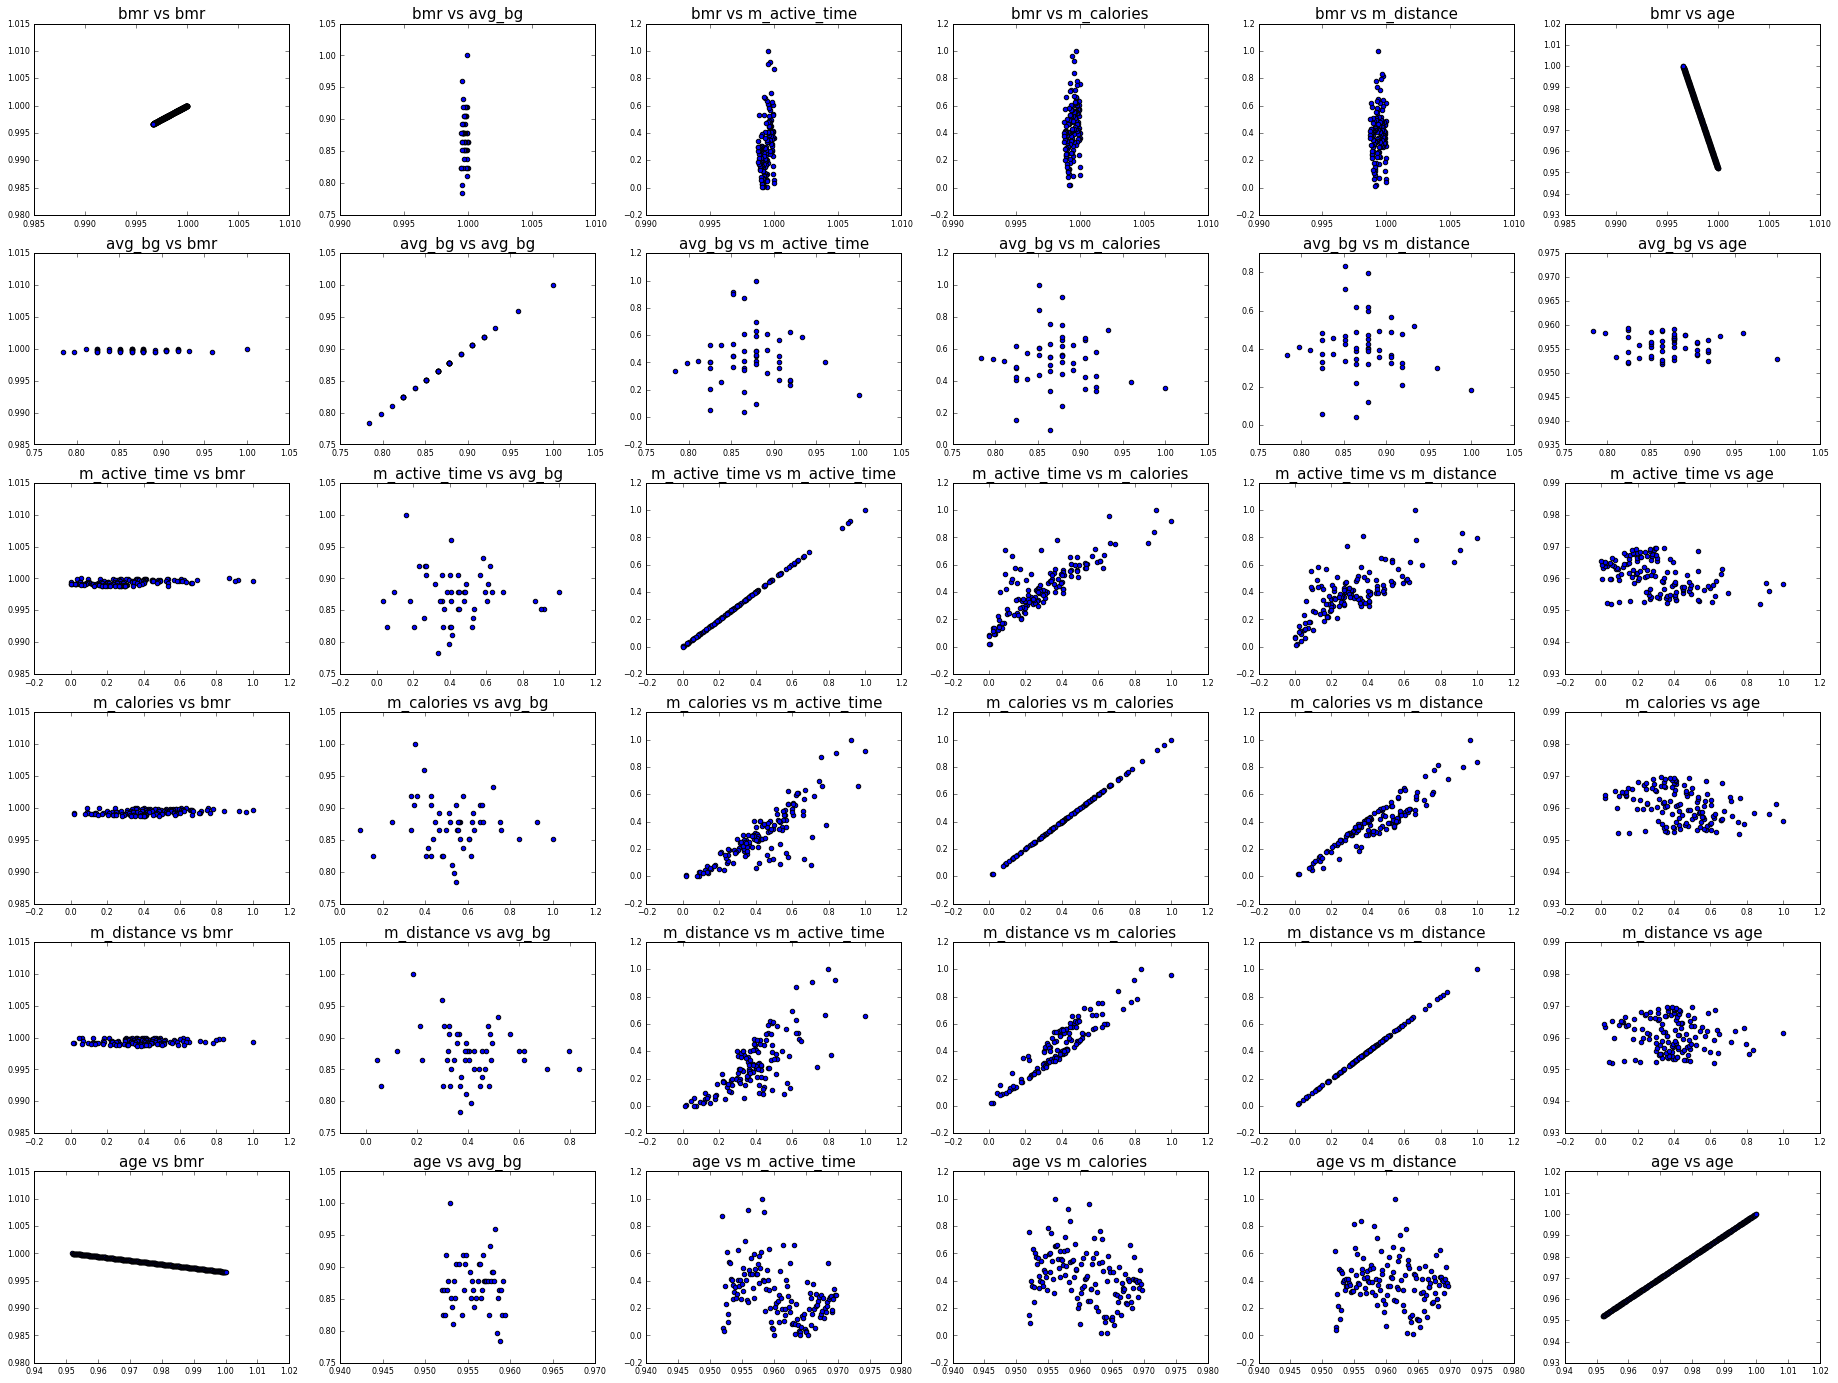

In [31]:
# r1, r2 = int(numFeatures/2 - np.floor(n/2)), int(numFeatures/2 + np.ceil(n/2))
r1, r2 = 0, n
selectedFeatures = np.take(rankFeatures, np.arange(r1, r2))
selectedData = getFeatures(dataAll, selectedFeatures)

plotMatrix1(rankFeatures, selectedData)